In [1]:
# Find out your current working directory
import os
print(os.getcwd())

C:\Users\Lenovo


In [2]:
#1) Prepare Problem
#a) Load Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas import get_dummies
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime


In [3]:
#b. Load Dataset
startTimeScript = datetime.now()


In [4]:
# inputFile = 'default-of-credit-card-clients.csv'
entireDataset = read_csv("C:/Users/Lenovo/Desktop/DS/3. Projects/Main Projects/Credit_Card_Default_Classification/default-of-credit-card-clients.csv")

In [5]:
# Rename the target variable column to a standard name "targetVar"
entireDataset = entireDataset.rename(columns={'default payment next month': 'targetVar'})
# Drop the Customer ID field as the label column has no relevance in the prediction exercise
entireDataset.drop('ID', axis=1, inplace=True)

In [6]:
print(entireDataset.head(20))

    LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0       20000    2          2         1   24      2      2     -1     -1   
1      120000    2          2         2   26     -1      2      0      0   
2       90000    2          2         2   34      0      0      0      0   
3       50000    2          2         1   37      0      0      0      0   
4       50000    1          2         1   57     -1      0     -1      0   
5       50000    1          1         2   37      0      0      0      0   
6      500000    1          1         2   29      0      0      0      0   
7      100000    2          2         2   23      0     -1     -1      0   
8      140000    2          3         1   28      0      0      2      0   
9       20000    1          3         2   35     -2     -2     -2     -2   
10     200000    2          3         2   34      0      0      2      0   
11     260000    2          1         2   51     -1     -1     -1     -1   
12     63000

In [7]:
#2) Summarize data
#2.a) Descriptive statistics
# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1

In [8]:
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0:
    dispRow = totAttr // dispCol
else:
    dispRow = (totAttr // dispCol)+1

In [9]:
#2.a.i) Peek at the data itself
set_option('display.width', 100)
print(entireDataset.head(20))

    LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  ...  BILL_AMT4  \
0       20000    2          2         1   24      2      2     -1     -1     -2  ...          0   
1      120000    2          2         2   26     -1      2      0      0      0  ...       3272   
2       90000    2          2         2   34      0      0      0      0      0  ...      14331   
3       50000    2          2         1   37      0      0      0      0      0  ...      28314   
4       50000    1          2         1   57     -1      0     -1      0      0  ...      20940   
5       50000    1          1         2   37      0      0      0      0      0  ...      19394   
6      500000    1          1         2   29      0      0      0      0      0  ...     542653   
7      100000    2          2         2   23      0     -1     -1      0      0  ...        221   
8      140000    2          3         1   28      0      0      2      0      0  ...      12211   
9       20

In [10]:
#2.a.ii) Dimensions of the dataset
print(entireDataset.shape)

(30000, 24)


In [11]:
#2.a.iii) Types of the attributes
print(entireDataset.dtypes)

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
targetVar    int64
dtype: object


In [12]:
#2.a.iv) Statistical summary of all attributes.
print(entireDataset.describe())

            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE         PAY_0  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500     -0.016700   
std     129747.661567      0.489129      0.790349      0.521970      9.217904      1.123802   
min      10000.000000      1.000000      0.000000      0.000000     21.000000     -2.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000     -1.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000      0.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000      0.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000      8.000000   

              PAY_2         PAY_3         PAY_4         PAY_5  ...      BILL_AMT4      BILL_AMT5  \
count  30000.000000  30000.000000  30000.000

In [13]:
#2.a.v) Summarize the levels of the class attribute
print(entireDataset.groupby('targetVar').size())

targetVar
0    23364
1     6636
dtype: int64


In [14]:
#2.a.v) Count missing values.
print(entireDataset.isnull().sum())

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
targetVar    0
dtype: int64


In [15]:
#2.b) Data visualizations
#2.b.i) Univariate plots to better understand each attribute
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

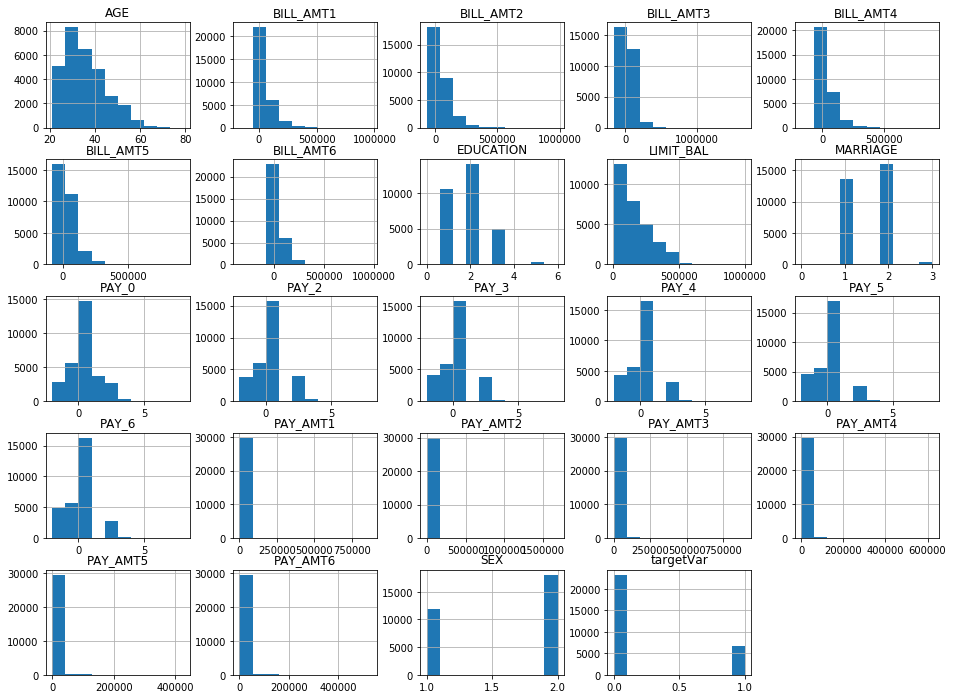

In [16]:
# Histograms for each attribute
entireDataset.hist()
pyplot.show()

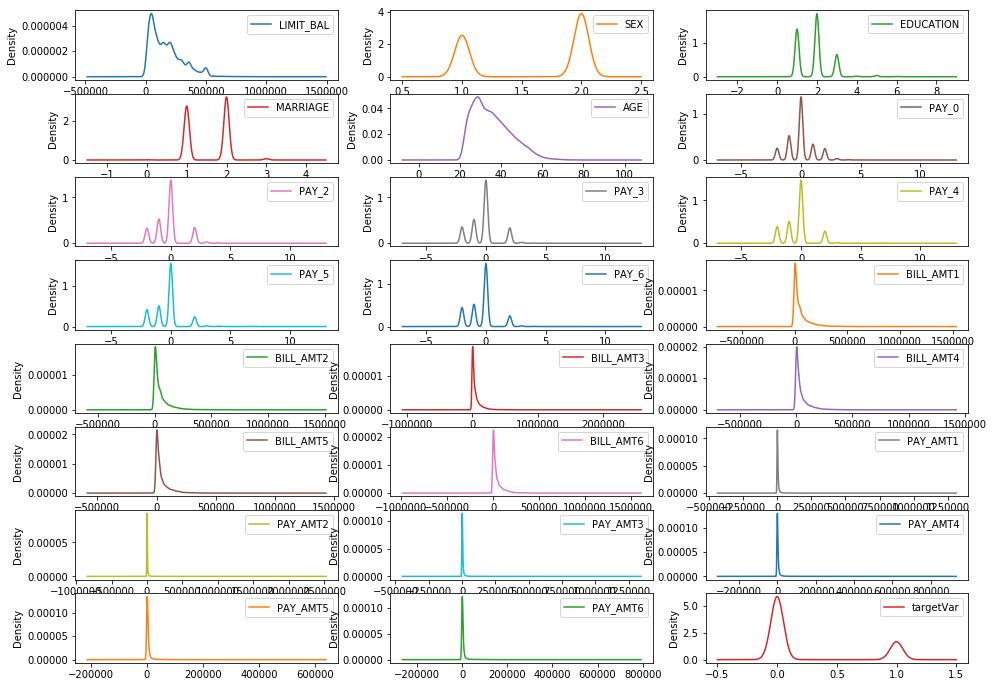

In [17]:
# Density plot for each attribute
entireDataset.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False)
pyplot.show()

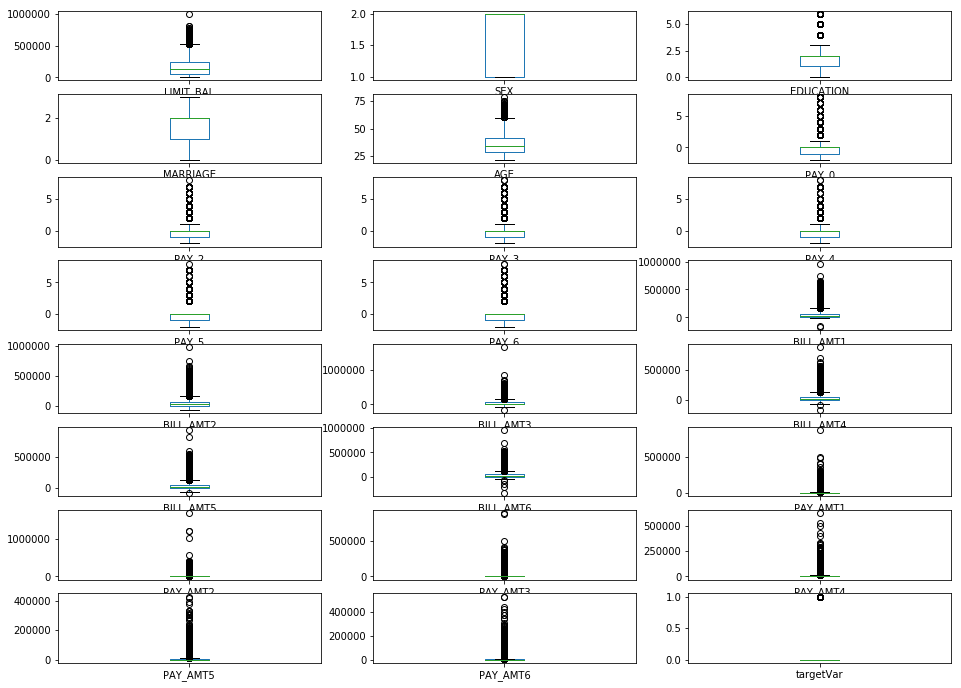

In [18]:
# Box and Whisker plot for each attribute
entireDataset.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

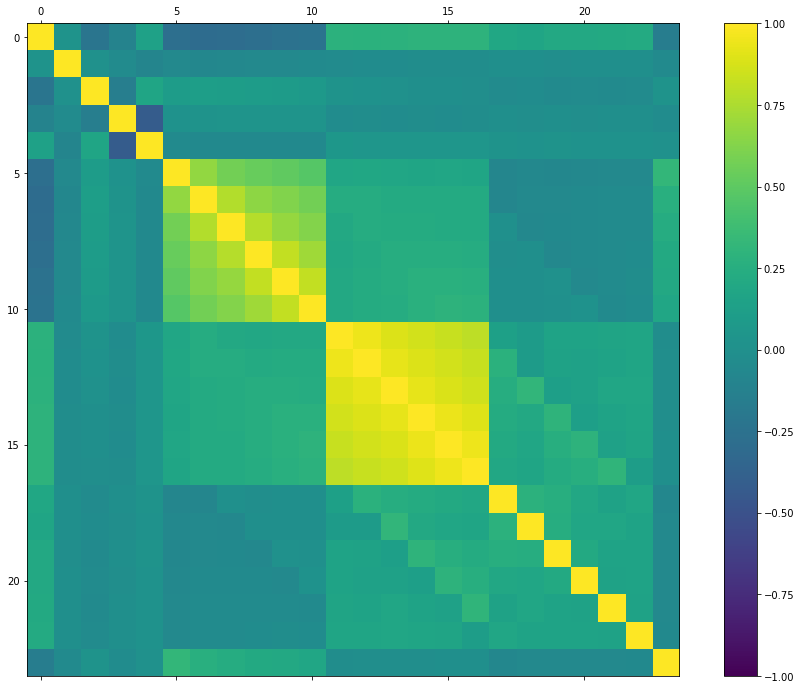

In [19]:
#2.b.ii) Multivariate plots to better understand the relationships between attributes
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(entireDataset.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

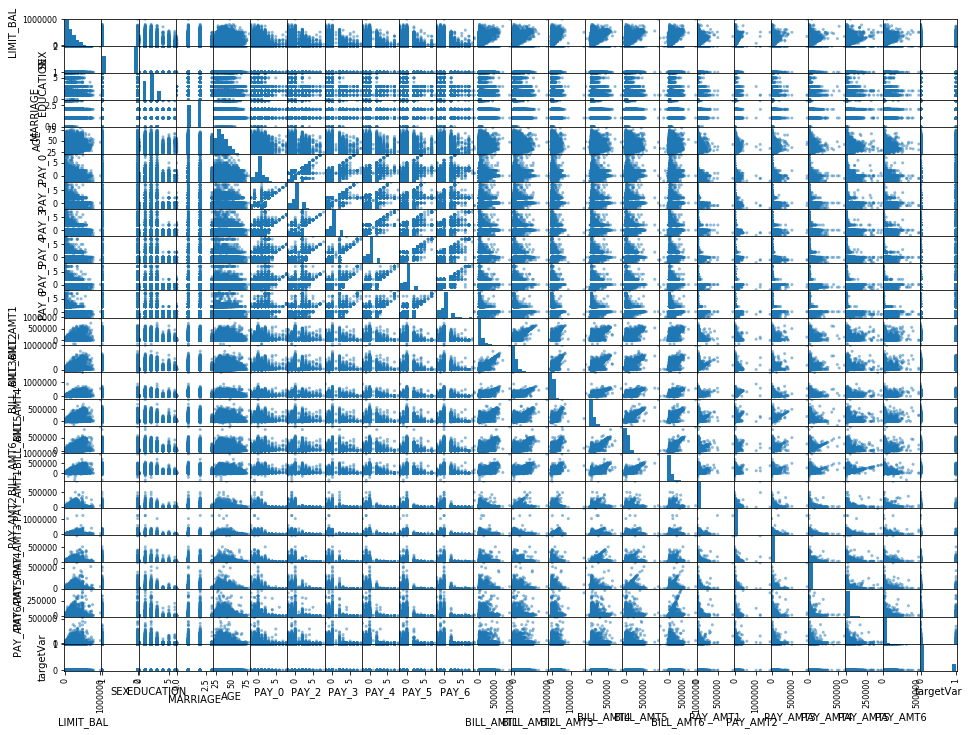

In [20]:
# Scatterplot matrix
scatter_matrix(entireDataset)
pyplot.show()

In [21]:
#3.a) Data Cleaning
# Correct the invalid values in the Education and Marital Status columns
entireDataset.EDUCATION[entireDataset.EDUCATION == 0] = 4
entireDataset.EDUCATION[entireDataset.EDUCATION == 5] = 4
entireDataset.EDUCATION[entireDataset.EDUCATION == 6] = 4
entireDataset.MARRIAGE[entireDataset.MARRIAGE == 0] = 3


In [22]:
#3.b) Feature Selection
# Not applicable for this iteration of the project.

In [23]:
#3.c) Data Transforms
# Convert the credit limit attribute into bins
credit_bins = [0, 50000, 100000, 200000, 500000, 800000, 1000000]
credit_labels = [1, 2, 3, 4, 5, 6]
entireDataset['CREDIT_BIN'] = pd.cut(entireDataset['LIMIT_BAL'], bins = credit_bins, labels=credit_labels)
# Drop the Credit Limit field after binning
entireDataset.drop('LIMIT_BAL', axis=1, inplace=True)

In [24]:
# Convert the age attribute into bins
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = [1, 2, 3, 4, 5, 6]
entireDataset['AGE_BIN'] = pd.cut(entireDataset['AGE'], bins = age_bins, labels=age_labels)
# Drop the Age field after binning
entireDataset.drop('AGE', axis=1, inplace=True)

In [25]:
# Convert the integer variables to categorical variables as appropriate
entireDataset["SEX"] = entireDataset["SEX"].astype('category')
entireDataset["EDUCATION"] = entireDataset["EDUCATION"].astype('category')
entireDataset["MARRIAGE"] = entireDataset["MARRIAGE"].astype('category')
entireDataset["targetVar"] = entireDataset["targetVar"].astype('category')
print(entireDataset.dtypes)

SEX           category
EDUCATION     category
MARRIAGE      category
PAY_0            int64
PAY_2            int64
PAY_3            int64
PAY_4            int64
PAY_5            int64
PAY_6            int64
BILL_AMT1        int64
BILL_AMT2        int64
BILL_AMT3        int64
BILL_AMT4        int64
BILL_AMT5        int64
BILL_AMT6        int64
PAY_AMT1         int64
PAY_AMT2         int64
PAY_AMT3         int64
PAY_AMT4         int64
PAY_AMT5         int64
PAY_AMT6         int64
targetVar     category
CREDIT_BIN    category
AGE_BIN       category
dtype: object


In [26]:
# Apply the One-Hot-Encoding (Dummy Variables) technique
entireDataset_dummies = get_dummies(entireDataset)
entireDataset_dummies['targetVar'] = entireDataset_dummies['targetVar_1']
entireDataset_dummies.pop('targetVar_0')
entireDataset_dummies.pop('targetVar_1')
print(entireDataset_dummies.dtypes)

PAY_0           int64
PAY_2           int64
PAY_3           int64
PAY_4           int64
PAY_5           int64
PAY_6           int64
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
SEX_1           uint8
SEX_2           uint8
EDUCATION_1     uint8
EDUCATION_2     uint8
EDUCATION_3     uint8
EDUCATION_4     uint8
MARRIAGE_1      uint8
MARRIAGE_2      uint8
MARRIAGE_3      uint8
CREDIT_BIN_1    uint8
CREDIT_BIN_2    uint8
CREDIT_BIN_3    uint8
CREDIT_BIN_4    uint8
CREDIT_BIN_5    uint8
CREDIT_BIN_6    uint8
AGE_BIN_1       uint8
AGE_BIN_2       uint8
AGE_BIN_3       uint8
AGE_BIN_4       uint8
AGE_BIN_5       uint8
AGE_BIN_6       uint8
targetVar       uint8
dtype: object


In [27]:
print(entireDataset_dummies.head())

   PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  ...  \
0      2      2     -1     -1     -2     -2       3913       3102        689          0  ...   
1     -1      2      0      0      0      2       2682       1725       2682       3272  ...   
2      0      0      0      0      0      0      29239      14027      13559      14331  ...   
3      0      0      0      0      0      0      46990      48233      49291      28314  ...   
4     -1      0     -1      0      0      0       8617       5670      35835      20940  ...   

   CREDIT_BIN_4  CREDIT_BIN_5  CREDIT_BIN_6  AGE_BIN_1  AGE_BIN_2  AGE_BIN_3  AGE_BIN_4  \
0             0             0             0          1          0          0          0   
1             0             0             0          1          0          0          0   
2             0             0             0          0          1          0          0   
3             0             0             0          0     

In [28]:
#3.d) Split-out training and validation datasets
seedNum = 777
X_entire = entireDataset_dummies.loc[:, 'PAY_0':'AGE_BIN_6'].values
Y_entire = entireDataset_dummies['targetVar'].values
validation_size = 0.30
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (30000, 39) Y_entire.shape: (30000,)
X_train.shape: (21000, 39) Y_train.shape: (21000,)
X_validation.shape: (9000, 39) Y_validation.shape: (9000,)
Total time for data handling and visualization: 0:46:56.909729


In [29]:
#4. Model and Evaluate Algorithms
#4.a) Set test options and evaluation metric
num_folds = 10
scoring = 'accuracy'

In [30]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BT', BaggingClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
results = []
names= []
metrics = []

In [31]:
# Generate model in turn
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print('Model training time:', (datetime.now() - startTimeModule))
print('Average metrics (accuracy %) from all models', np.mean(metrics()))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

LR: 0.781238 (0.006657)
Model training time: 0:00:19.170273
CART: 0.722476 (0.012112)
Model training time: 0:00:23.731905
NB: 0.371000 (0.010170)
Model training time: 0:00:01.198037
KNN: 0.759000 (0.006702)
Model training time: 0:00:26.047329


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

SVM: 0.780238 (0.006279)
Model training time: 1:36:56.525381
BT: 0.802381 (0.005730)
Model training time: 0:01:08.958029


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

ET: 0.786381 (0.008452)
Model training time: 0:00:09.103544
AB: 0.813762 (0.004614)
Model training time: 0:00:58.322383


TypeError: 'list' object is not callable

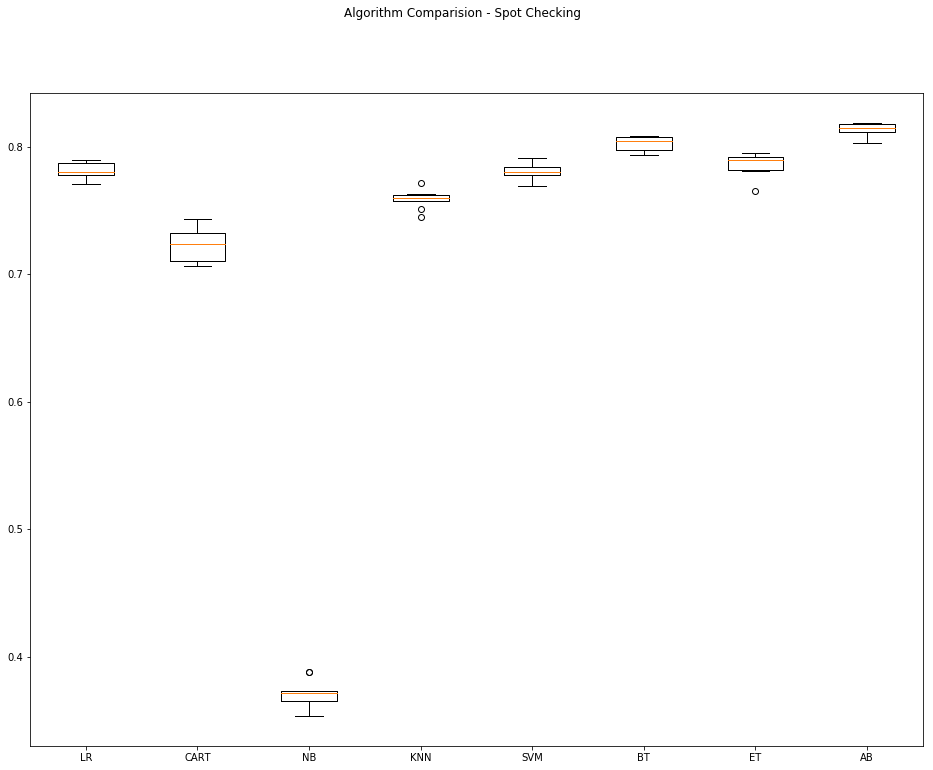

In [32]:
#4.b) Spot-checking baseline algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparision - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [33]:
#Section 5 - Improve Accuracy
#5.a) Algorithm Tuning
# Set up the comparison array
results = []
names = []

In [35]:
# Tuning algorithm #1 - Random Forest
startTimeModule = datetime.now()
paramGrid1 = dict(n_estimators=np.array([200,300,500,700,900]))
model1 = RandomForestClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('RF')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.814048 using {'n_estimators': 700}
0.811762 (0.005545) with: {'n_estimators': 200}
0.812524 (0.005217) with: {'n_estimators': 300}
0.813238 (0.005137) with: {'n_estimators': 500}
0.814048 (0.004519) with: {'n_estimators': 700}
0.813714 (0.004601) with: {'n_estimators': 900}
Model training time: 0:57:38.412221


In [38]:
# Tuning algorithm #2 - AdaBoost
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=np.array([100,200,300,400,500]))
model2 = AdaBoostClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('AB')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.814905 using {'n_estimators': 200}
0.814381 (0.004865) with: {'n_estimators': 100}
0.814905 (0.005675) with: {'n_estimators': 200}
0.814857 (0.005690) with: {'n_estimators': 300}
0.814381 (0.005581) with: {'n_estimators': 400}
0.814286 (0.006102) with: {'n_estimators': 500}
Model training time: 0:28:41.580130


In [40]:
# Tuning algorithm #3 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid3 = dict(n_estimators=np.array([25,50,100,150,200]))
model3 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold)
grid_result3 = grid3.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
results.append(grid_result3.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.819714 using {'n_estimators': 50}
0.818381 (0.006523) with: {'n_estimators': 25}
0.819714 (0.006062) with: {'n_estimators': 50}
0.818857 (0.005743) with: {'n_estimators': 100}
0.817714 (0.005943) with: {'n_estimators': 150}
0.817190 (0.005976) with: {'n_estimators': 200}
Model training time: 0:13:45.138344


In [42]:
# Tuning algorithm #4 - Bagged CART
startTimeModule = datetime.now()
paramGrid4 = dict(n_estimators=np.array([50,100,150,200,250]))
model4 = BaggingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid4 = GridSearchCV(estimator=model4, param_grid=paramGrid4, scoring=scoring, cv=kfold)
grid_result4 = grid4.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
results.append(grid_result4.cv_results_['mean_test_score'])
names.append('BT')
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.811762 using {'n_estimators': 250}
0.809429 (0.004348) with: {'n_estimators': 50}
0.810286 (0.004064) with: {'n_estimators': 100}
0.810619 (0.004493) with: {'n_estimators': 150}
0.811714 (0.003945) with: {'n_estimators': 200}
0.811762 (0.004152) with: {'n_estimators': 250}
Model training time: 1:31:57.164087


In [45]:
# Tuning algorithm #5 - Extra Trees
startTimeModule = datetime.now()
paramGrid5 = dict(n_estimators=np.array([100,150,200,250,300]))
model5 = ExtraTreesClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid5 = GridSearchCV(estimator=model5, param_grid=paramGrid5, scoring=scoring, cv=kfold)
grid_result5 = grid5.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))
results.append(grid_result5.cv_results_['mean_test_score'])
names.append('ET')
means = grid_result5.cv_results_['mean_test_score']
stds = grid_result5.cv_results_['std_test_score']
params = grid_result5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.799048 using {'n_estimators': 100}
0.799048 (0.006124) with: {'n_estimators': 100}
0.798048 (0.005999) with: {'n_estimators': 150}
0.796857 (0.006711) with: {'n_estimators': 200}
0.797857 (0.006671) with: {'n_estimators': 250}
0.797238 (0.006851) with: {'n_estimators': 300}
Model training time: 0:16:18.024867


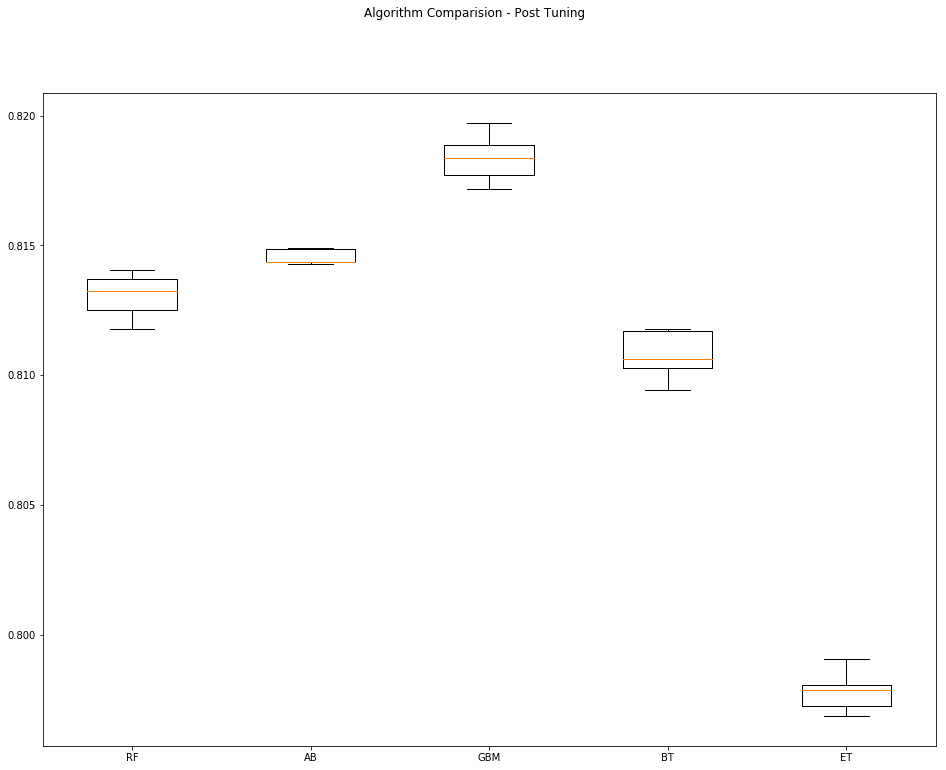

In [46]:
#5.b) Compare Algorithms After Tuning
fig = pyplot.figure()
fig.suptitle('Algorithm Comparision - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [48]:
#Section 6 - Finalize Model
#6.a) Predictions on validation dataset
model = GradientBoostingClassifier(n_estimators = 50, random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8275555555555556
[[6714  319]
 [1233  734]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.90      7033
           1       0.70      0.37      0.49      1967

   micro avg       0.83      0.83      0.83      9000
   macro avg       0.77      0.66      0.69      9000
weighted avg       0.81      0.83      0.81      9000



In [49]:
#6.b) Create standalone model on entire training dataset
startTimeModule = datetime.now()
finalModel = GradientBoostingClassifier(n_estimators=50, random_state=seedNum)
finalModel.fit(X_entire, Y_entire)
print("ModelTraining Time:", (datetime.now() - startTimeModule))

ModelTraining Time: 0:00:07.720040


In [50]:
#6.c) Save model for later use
from sklearn.externals import joblib
modelName = 'finalModel_BinaryClass.sav'
joblib.dump(finalModel, modelName)

['finalModel_BinaryClass.sav']

In [51]:
modelName = 'finalModel_BinaryClass.sav'
dump(finalModel, modelName)
print('Total time for the script:', (datetime.now() - startTimeScript))

Total time for the script: 6:15:30.433458
